# Predicting House Prices with Regression using TensorFlow

# Task 1: Introduction

---

For this project, I am going to work on evaluating price of houses given the following features:

1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude


I use the following packages: `tensorflow`, `pandas`, `matplotlib`, `scikit-learn`.

## 1.1: Importing Libraries & Helper Functions

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

# Task 2: Importing the Data

In [71]:
df = pd.read_csv("data.csv", names = column_names)
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,NaN,84,129,14797,NaN,NaN,NaN,NaN
1,146.0,2003,30,0,5.0,86.0,120.0,13180.0
2,147.0,2007,13,10,4.0,81.0,128.0,14107.0
3,148.0,2018,18,6,5.0,84.0,128.0,13986.0
4,149.0,2012,7,8,2.0,87.0,127.0,13140.0


## 2.2: Check Missing Data

In [72]:
# Checking missing values in the dataset
print(df.isna().sum())
df = df.dropna()

serial       1
date         0
age          0
distance     0
stores       1
latitude     1
longitude    1
price        1
dtype: int64


Due to the few NaN values, I decided to drop them in order to clean the dataset.

# Task 3: Data Normalization

## 3.1: Data Normalization

To make it easier for optimization algorithms to find minimas, I normalize the data before training a model.

In [73]:
df = df.iloc[:, 1:]
df_norm = (df - df.mean())/df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
1,-1.087732,0.969210,-1.549234,0.026587,0.323799,-1.580082,-0.707735
2,-0.354801,-0.526978,1.574979,-0.291276,-1.257727,0.946904,0.196839
3,1.660759,-0.086923,0.325294,0.026587,-0.308811,0.946904,0.078766
4,0.561363,-1.055045,0.950137,-0.927001,0.640104,0.631031,-0.746767
5,0.561363,0.881198,0.325294,-0.609139,0.640104,0.315157,0.530565


## 3.2: Convert Label Value

I convert the predicted values (normalized) back to the original distribution.

In [75]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

# Task 4: Create Training and Test Sets

## 4.1: Select Features

In [76]:
# Removing 'price' column from the features
x = df_norm.iloc[:, :6]
x.head()

,date,age,distance,stores,latitude,longitude
1,-1.087732,0.969210,-1.549234,0.026587,0.323799,-1.580082
2,-0.354801,-0.526978,1.574979,-0.291276,-1.257727,0.946904
3,1.660759,-0.086923,0.325294,0.026587,-0.308811,0.946904
4,0.561363,-1.055045,0.950137,-0.927001,0.640104,0.631031
5,0.561363,0.881198,0.325294,-0.609139,0.640104,0.315157


## 4.2: Select Labels

In [77]:
# Removing all the columns except 'price' (label)
y = df_norm.iloc[:, -1]
y.head()

1   -0.707735
2    0.196839
3    0.078766
4   -0.746767
5    0.530565
Name: price, dtype: float64

## 4.3: Feature and Label Values

In [78]:
x_arr = x.values
y_arr = y.values

print('features array shape:', x_arr.shape)
print('labels array shape:', y_arr.shape)

features array shape: (4854, 6)
labels array shape: (4854,)


## 4.4: Train and Test Split

In [58]:
# The proportion of the df to include in the test split is 0.05
# 'random_state' => random number generator seeded
x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size = 0.05,
                                                   random_state = 0)

print('Training set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Training set: (4611, 6) (4611,)
Test set: (243, 6) (243,)


# Task 5: Create the Model

## 5.1: Create the Model

In [59]:
def get_model():
    """
    The function returns an untrained model. 
    """
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])
    model.compile(loss = 'mse', optimizer= 'adam')
    return model

get_model().summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                70        
                                                                 
 dense_25 (Dense)            (None, 20)                220       
                                                                 
 dense_26 (Dense)            (None, 5)                 105       
                                                                 
 dense_27 (Dense)            (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


The Sequential model is used due to each layer has exactly one input tensor and one output tensor.

# Task 6: Model Training

## 6.1: Model Training

In [60]:
es_cb = EarlyStopping(monitor = 'val_loss', patience = 5)

model = get_model()
preds_on_untrained = model.predict(x_test)

history = model.fit(x_train, y_train,validation_data = (x_test, y_test),epochs = 100,callbacks = [es_cb])

Epoch 1/100
145/145 [==============================] - 2s 6ms/step - loss: 0.9654 - val_loss: 0.5579
Epoch 2/100
145/145 [==============================] - 1s 5ms/step - loss: 0.5563 - val_loss: 0.4339
Epoch 3/100
145/145 [==============================] - 1s 5ms/step - loss: 0.4562 - val_loss: 0.3669
Epoch 4/100
145/145 [==============================] - 1s 5ms/step - loss: 0.3977 - val_loss: 0.3186
Epoch 5/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3540 - val_loss: 0.2864
Epoch 6/100
145/145 [==============================] - 1s 5ms/step - loss: 0.3195 - val_loss: 0.2577
Epoch 7/100
145/145 [==============================] - 1s 5ms/step - loss: 0.2921 - val_loss: 0.2398
Epoch 8/100
145/145 [==============================] - 1s 6ms/step - loss: 0.2697 - val_loss: 0.2240
Epoch 9/100
145/145 [==============================] - 1s 6ms/step - loss: 0.2536 - val_loss: 0.2119
Epoch 10/100
145/145 [==============================] - 1s 5ms/step - loss: 0.2394 - val_lo

## 6.2: Plot Training and Validation Loss

Training and validation loss.

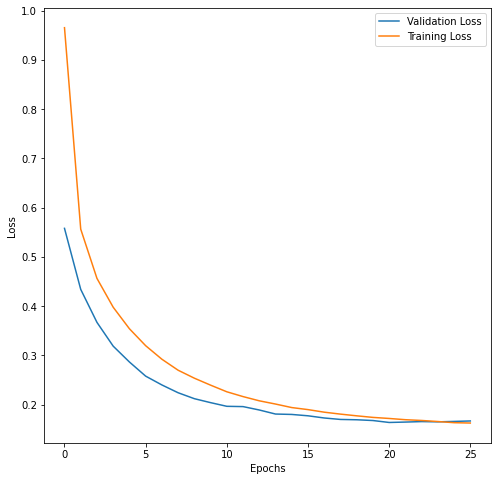

In [61]:
plot_loss(history)

# Task 7: Predictions

## 7.1: Plot Raw Predictions

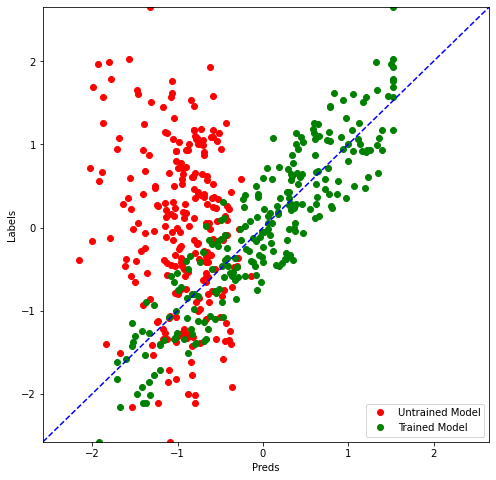

In [62]:
preds_on_trained = model.predict(x_test)
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

## 7.2: Plot Price Predictions

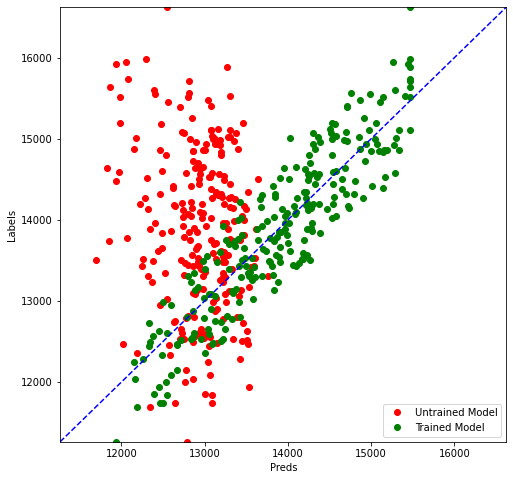

In [64]:
price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained = [convert_label_value(y) for y in preds_on_trained]
price_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_untrained, price_trained, price_test)